# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

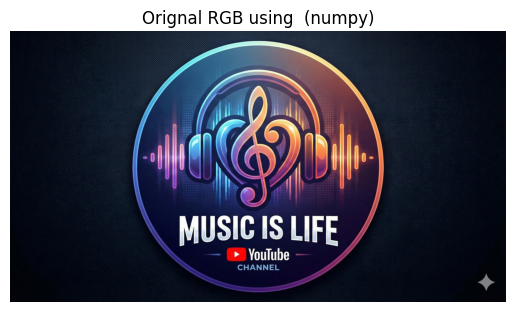

In [32]:


#import important libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt



#1.
# LOAD IMAGE
img_bgr = cv2.imread('/content/music.png')
# CONVERT BGR TO RGB
img_rgb = img_bgr[:, :, ::-1]

# DISPLAY Orignal RGB IMAGE
plt.imshow(img_rgb)
plt.title("Orignal RGB using  (numpy)")
plt.axis("off")
plt.show()




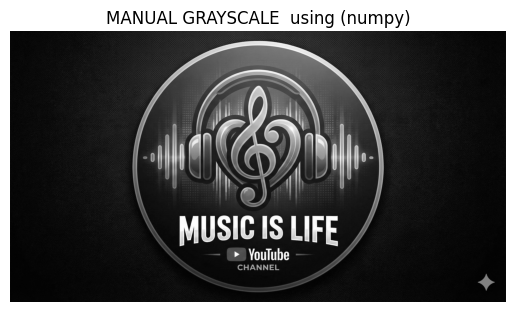

In [21]:
#2.
# GRAYSCALE CONVERSION MANUAL

# We select channels by index: 0=Red, 1=Green, 2=Blue
r,g,b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
# Apply the weighted formula manually: 0.299*R + 0.587*G + 0.114*B
gray = 0.299*r + 0.587*g + 0.114*b

#DISPLAY MANUAL GRAYSCALE IMAGE
plt.imshow(gray,cmap='gray')
plt.title("MANUAL GRAYSCALE  using (numpy)")
plt.axis("off")
plt.show()


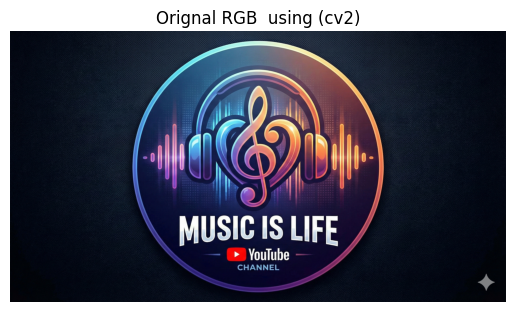

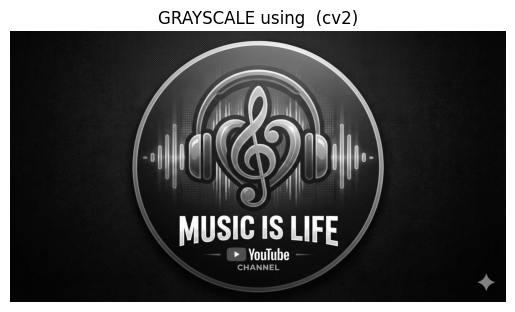

In [22]:

#3.
# USING cvtColor function to do the same and compare results

# CONVERT BGR TO RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# DISPLAY Orignal RGB IMAGE
plt.imshow(img_rgb)
plt.title("Orignal RGB  using (cv2)")
plt.axis("off")
plt.show()

# GRAYSCALE CONVERSION
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# DISPLAY MANUAL GRAYSCALE IMAGE
plt.imshow(gray,cmap='gray')
plt.title("GRAYSCALE using  (cv2)")
plt.axis("off")
plt.show()


In [23]:

# 4 & 5.
# Shapes and Pixels
print("RGB Shape:", img_rgb.shape)
print("Gray Shape:", gray.shape)
print("Pixel Sample (RGB):", img_rgb[0,0])
print("Pixel Sample (Gray):", gray[0,0])


RGB Shape: (1536, 2816, 3)
Gray Shape: (1536, 2816)
Pixel Sample (RGB): [1 2 7]
Pixel Sample (Gray): 2


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [24]:

# B1.
# Convet to float for math
gray_float = gray.astype(np.float32)
# Compute FFT
f = np.fft.fft2(gray_float)
#Shift Low Frequecies to center
f_shift = np.fft.fftshift(f)


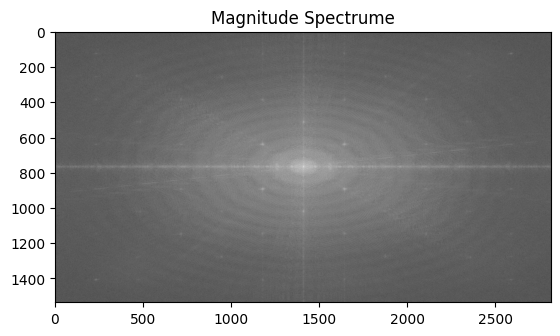

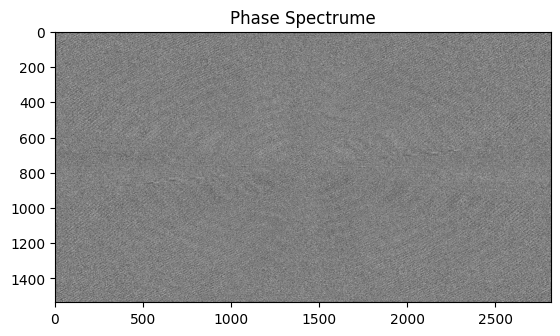

In [25]:
# B2.
# Magnitude Spectrum
mag_spec = np.log(1+np.abs(f_shift))

# Phase Spectrum
phase_spec = np.angle(f_shift)

# Display Magnitude Spectrum
plt.imshow(mag_spec,cmap='gray')
plt.title("Magnitude Spectrume")
plt.show()

# Display Phase Spectrum
plt.imshow(phase_spec , cmap='gray')
plt.title("Phase Spectrume")
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [26]:
# Get image dimensions and center point
rows, cols = gray.shape
crow, ccol = rows // 2 , cols // 2  # Integer division to find the center

#Function 1: Create Circular Mask (Without cv2)
def create_circular_mask(h,w,center,radius,mode ='lowpass'):
  Y,X = np.ogrid[:h,:w]    #->Create grids of coordinates for Y and X
  # Calculate distance of every pixel from the center (Pythagoras theorem)
  dist_from_center = np.sqrt((X-center[1])**2 + (Y-center[0])**2)

  if mode =='lowpass':
    return dist_from_center <= radius #-> Keep inside circle (True/1), Block outside (False/0)
  elif mode =='highpass':
    return dist_from_center >= radius # ->  Block inside circle (False/0), Keep outside (True/1)


#Function 2: Reconstruction
def reconstruct_and_show(f_shifted_filtered, title):
  # 1. Shift the zero-frequency component back to the top-left
    f_ishift = np.fft.ifftshift(f_shifted_filtered)
    # 2. Compute the Inverse FFT (convert frequency back to spatial image)
    img_back = np.fft.ifft2(f_ishift)
    # 3. Take absolute value (magnitude) to handle complex numbers
    img_back = np.abs(img_back)
    # 4. Display
    plt.figure(figsize=(6,6))
    plt.imshow(img_back, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()






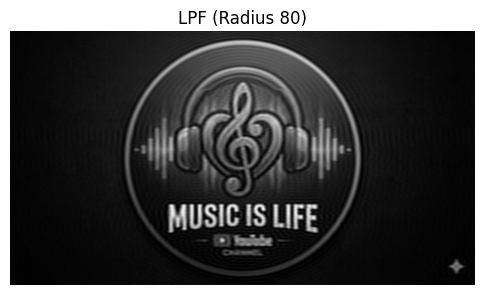

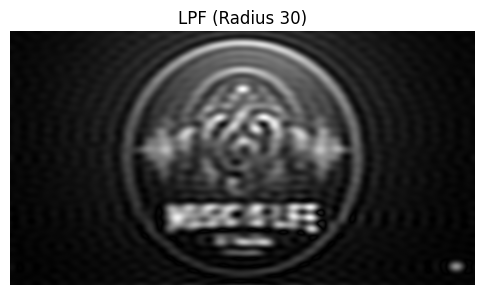

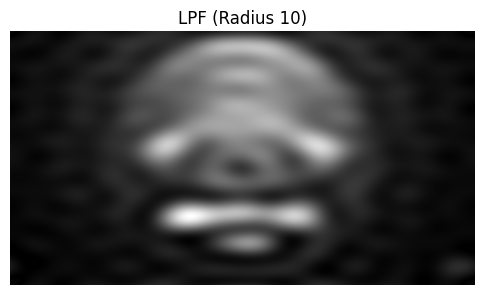

In [33]:
# C1. Create 3 LPF (Low Pass Filter) masks

radii = [80, 30, 10]   #-> as we know as radius increases the image gets blur

for r in radii:

    mask_lpf = create_circular_mask(rows, cols, (crow, ccol), r, mode='lowpass') #-> it create the mask that only passes low frequencies near center and block high freq at edges
    f_shift_lpf = f_shift * mask_lpf #-> Apply the mask to the shifted FFT

    # 3. Reconstruct and Display


    reconstruct_and_show(f_shift_lpf, f"LPF (Radius {r})")

    #  As the radius decreases, we cut off more high-frequency components (edges/details).
    # Since only low frequencies (general structure/color) remain, the image becomes blurrier.





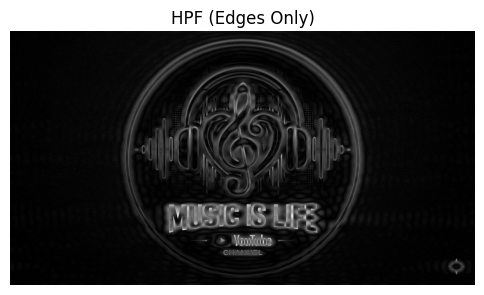

In [27]:
# C2. Create HPF (High Pass Filter) mask
# Instructions: Apply and Reconstruct.
radius_hpf = 30


mask_hpf = create_circular_mask(rows, cols, (crow, ccol), radius_hpf, mode='highpass') #-> here we create high pass filter that blocks low frequencies at center and passes high frequencies at edges


f_shift_hpf = f_shift * mask_hpf # -> here we apply fshift

reconstruct_and_show(f_shift_hpf, "HPF (Edges Only)") #-> Reconstruct

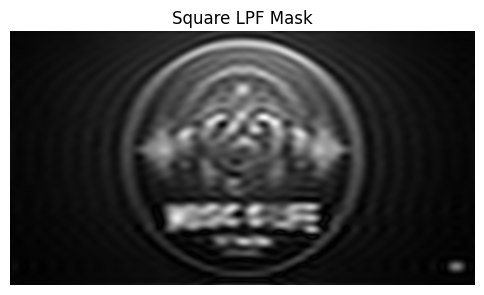

In [28]:
# C3. Create a Square LPF mask
# Instructions: Side of square 50. Center of filter.
mask_square = np.zeros((rows, cols)) # Start with a black mask
side = 50
half_side = side // 2

# 1. Create the square manually using slicing
# We go from center-25 to center+25 to get a width of 50
mask_square[crow-half_side:crow+half_side, ccol-half_side:ccol+half_side] = 1


f_shift_sq = f_shift * mask_square #-> here we Apply mask

reconstruct_and_show(f_shift_sq, "Square LPF Mask")  #-> Reconstruct

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

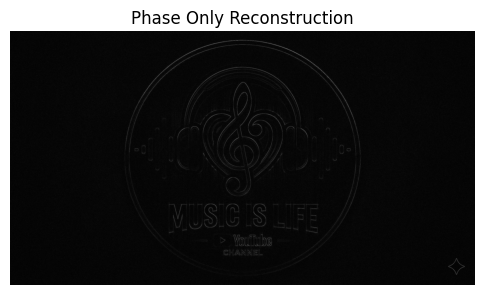

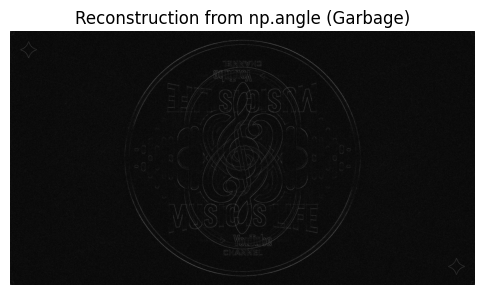

In [29]:
# D1. Phase-only reconstruction


# 1. Compute Phase Only (Normalized Complex Numbers)
# We divide by absolute value to set Magnitude to 1, but keep the Complex Phase (direction).
phase_only = f_shift / np.abs(f_shift)

# 2. Reconstruct and Display
# -> Phase contains the structural information (edges/shapes), so we see a "ghostly" version of the edges.
reconstruct_and_show(phase_only, "Phase Only Reconstruction")

# 3. Difference between 'phase_only' and 'np.angle(fshift)'
# -> 'phase_only' (calculated above) gives Complex numbers
# -> 'np.angle(fshift)' gives Scalar radians. It is just the number representing the angle.

# 4. Try reconstruction from np.angle(fshift)
angle_scalars = np.angle(f_shift) # Get the raw angle values (floats)
reconstruct_and_show(angle_scalars, "Reconstruction from np.angle (Garbage)")
# -> The output is noise/garbage because IFFT expects frequency coefficients (complex numbers), not raw angle scalars.

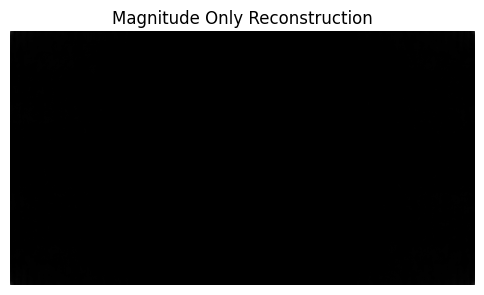

In [30]:
# D2. Magnitude-only reconstruction

# 1. Compute Magnitude Only
# We take the absolute value, effectively setting the Phase to 0 for all frequencies.
mag_only = np.abs(f_shift)

# 2. Reconstruct and Display
reconstruct_and_show(mag_only, "Magnitude Only Reconstruction")

# 3. Comments on Role of Logarithm and Appearance
# -> Role of Log (in Part B): We used Log there to compress the huge dynamic range so we could SEE the frequency plot.
# -> Why this looks different: This is a Spatial Domain image, not a Frequency plot.
# -> Without Phase (which tells waves 'where' to align), the constructive interference is lost.
# -> The result looks like a blob/texture because Phase holds the structure; Magnitude only holds the strength.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

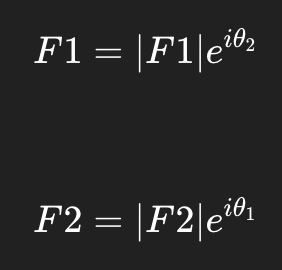

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


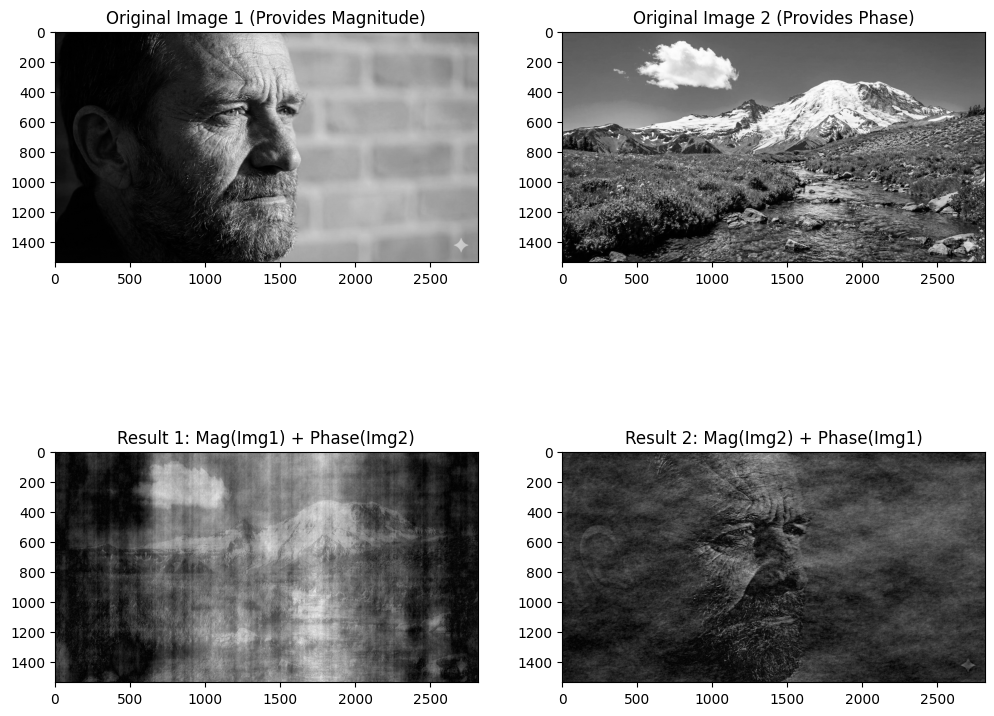

In [31]:

# PART E: Magnitude & Phase Swap


# 1. Load Two Images
img1 = cv2.imread('/content/img1.png', 0)       # Load Image 1 in Grayscale directly
img2 = cv2.imread('/content/img2.png', 0)     # Load Image 2 in Grayscale

# CRITICAL STEP: Resize Image 2 to match Image 1
# Frequency swapping requires arrays of exact same dimensions.
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# 2. Compute FFT for both
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)

# 3. Extract Magnitude and Phase
# Magnitude = Absolute value (Strength of frequencies)
mag1 = np.abs(fshift1)
mag2 = np.abs(fshift2)

# Phase = Angle of complex numbers (Structural information)
phase1 = np.angle(fshift1)
phase2 = np.angle(fshift2)

# 4. SWAP! Combine Magnitude of one with Phase of the other.
# Formula: F_new = Magnitude * e^(j * Phase)
# We use Euler's formula: e^(j*theta) = cos(theta) + j*sin(theta), handled by np.exp()

# New Image 1: Magnitude of Img 1 + Phase of Img 2
# Expectation: Should look like Image 2 (because Phase holds structure)
fshift_new1 = mag1 * np.exp(1j * phase2)

# New Image 2: Magnitude of Img 2 + Phase of Img 1
# Expectation: Should look like Image 1
fshift_new2 = mag2 * np.exp(1j * phase1)

# 5. Reconstruct (Inverse FFT)
def reconstruct(f_shifted):
    f_ishift = np.fft.ifftshift(f_shifted)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

img_swap1 = reconstruct(fshift_new1)
img_swap2 = reconstruct(fshift_new2)

# 6. Display Results
plt.figure(figsize=(12, 10))

# Row 1: Originals
plt.subplot(2, 2, 1); plt.imshow(img1, cmap='gray'); plt.title("Original Image 1 (Provides Magnitude)")
plt.subplot(2, 2, 2); plt.imshow(img2, cmap='gray'); plt.title("Original Image 2 (Provides Phase)")

# Row 2: Swapped
plt.subplot(2, 2, 3); plt.imshow(img_swap1, cmap='gray'); plt.title("Result 1: Mag(Img1) + Phase(Img2)")
plt.subplot(2, 2, 4); plt.imshow(img_swap2, cmap='gray'); plt.title("Result 2: Mag(Img2) + Phase(Img1)")

plt.show()

# FINAL OBSERVATION COMMENT
# OBSERVATION:
# You will notice that 'Result 1' looks primarily like 'Original Image 2', and 'Result 2' looks like 'Original Image 1'.
#
# WHY?
# Phase stores the LOCATION of the sine waves (where edges and transitions happen), which dictates the structure/shape.
# Magnitude stores the STRENGTH of the waves (contrast/brightness), which dictates the texture/illumination.
# Therefore, preserving the Phase preserves the recognizable object, while Magnitude just applies the "texture" of the other image.